Looking for cross basin tilt along different wind scenerios.

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import (nc_tools, viz_tools, gsw_calls)
import numpy.ma as ma
from matplotlib import animation, rc
from scipy.optimize import curve_fit
from visualisations import *
%matplotlib inline

In [2]:
rc('animation', html='html5')

In [4]:
def calc_rho(Sal, TempC, P):
    sqrSal = np.sqrt(Sal)
    R1 = ((((6.536332e-9 * TempC - 1.120083e-6) * TempC + 1.001685e-4)
           * TempC - 9.095290e-3) * TempC + 6.793952e-2) * TempC - 28.263737
    R2 = (((5.3875e-9 * TempC - 8.2467e-7) * TempC + 7.6438e-5)
          * TempC - 4.0899e-3) * TempC + 8.24493e-1
    R3 = (-1.6546e-6 * TempC + 1.0227e-4) * TempC - 5.72466e-3
    SIG = (4.8314e-4 * Sal + R3 * sqrSal + R2) * Sal + R1
    V350P = 1.0 / 1028.1063
    SVA   = -SIG * V350P / (1028.1063 + SIG)
    rho = 28.106331 - SVA / (V350P * (V350P + SVA)) + 1000
    return rho
def func(x,m,b):
    return m*x + b

In [5]:
lake_meshmask = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/lake_meshmask201702.nc')
U24W = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24UW/SalishSea_1h_20170101_20170105_grid_T.nc')
U24S = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24US/SalishSea_1h_20160601_20160605_grid_T.nc')
U48W = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48UW/SalishSea_1h_20170101_20170105_grid_T.nc')
U48S = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48US/SalishSea_1h_20160601_20160605_grid_T.nc')
U72W = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72UW/SalishSea_1h_20170101_20170105_grid_T.nc')
U72S = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72US/SalishSea_1h_20160601_20160605_grid_T.nc')

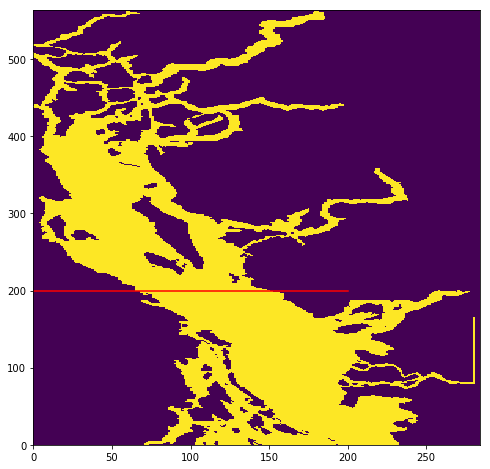

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pcolormesh(lake_meshmask.variables['tmask'][0,0,...])
ax.plot([0,200], [200,200], 'r-')

In [94]:
file2 = U24W
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])             

28.2299156189
11.509311676
0.204864947553


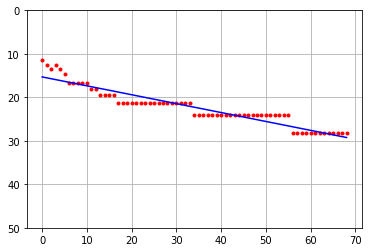

In [97]:
i = 30
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [34]:
file2 = U48W
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

28.2299156189
10.5047655106
0.213468427451


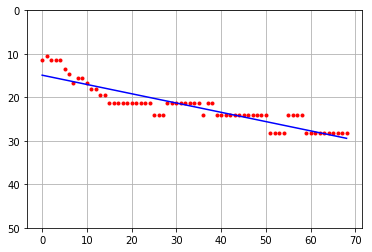

In [38]:
i = 24
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [39]:
file2 = U72W
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

28.2299156189
11.509311676
0.228863143153


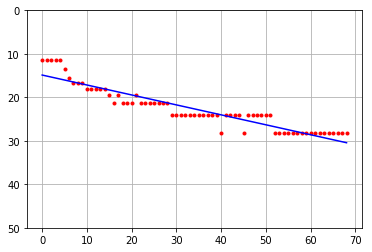

In [44]:
i = 17
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [45]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24UW0.1/SalishSea_1h_20170101_20170105_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

28.2299156189
7.50062322617
0.197451324029


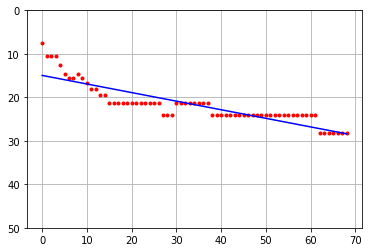

In [50]:
i = 47
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [51]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48UW0.1/SalishSea_1h_20170101_20170105_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

28.2299156189
6.50031042099
0.215303846287


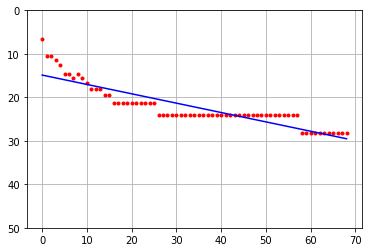

In [59]:
i = 40
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [60]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72UW0.1/SalishSea_1h_20170101_20170105_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

28.2299156189
7.50062322617
0.198712917308


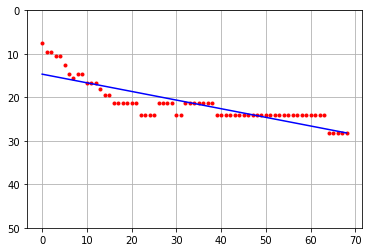

In [64]:
i = 34
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [65]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24UW0.3/SalishSea_1h_20170101_20170105_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

28.2299156189
11.509311676
0.213558681545


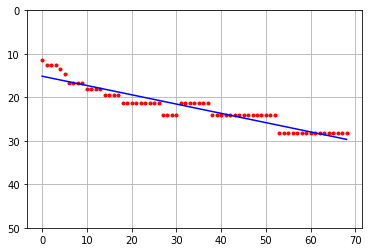

In [70]:
i = 26
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [71]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48UW0.3/SalishSea_1h_20170101_20170105_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

34.6857566833
12.5181665421
0.243318403763


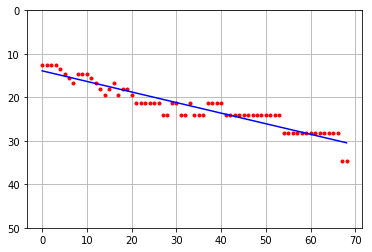

In [77]:
i = 20
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [78]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72UW0.3/SalishSea_1h_20170101_20170105_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

34.6857566833
10.5047655106
0.289675441743


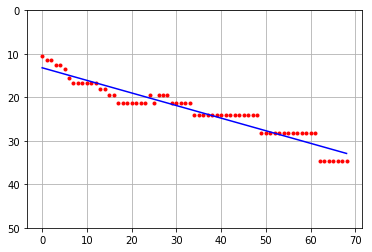

In [84]:
i = 15
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1023.3
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [98]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24US/SalishSea_1h_20160601_20160605_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

15.6342878342
6.50031042099
0.0967518569326


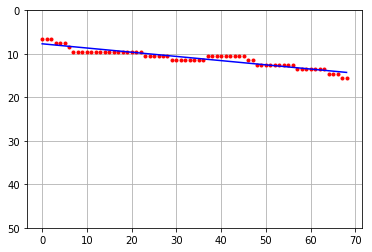

In [105]:
i = 25
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1022
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [106]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48US/SalishSea_1h_20160601_20160605_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

15.6342878342
6.50031042099
0.11439483872


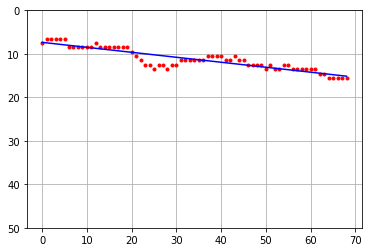

In [110]:
i = 19
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1022
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [158]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72US/SalishSea_1h_20160601_20160605_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

14.5689821243
4.5000705719
0.0993047011578


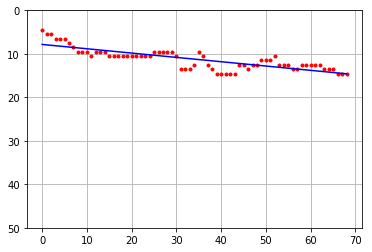

In [159]:
i = 12
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1022
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [120]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24US0.1/SalishSea_1h_20160601_20160605_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

14.5689821243
3.50003051758
0.106664186399


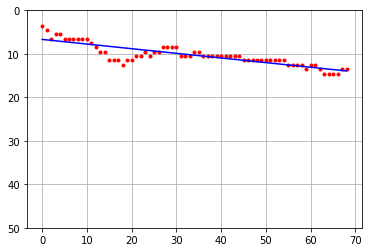

In [128]:
i = 32
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1022
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [160]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48US0.1/SalishSea_1h_20160601_20160605_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

12.5181665421
3.50003051758
0.0733817162875


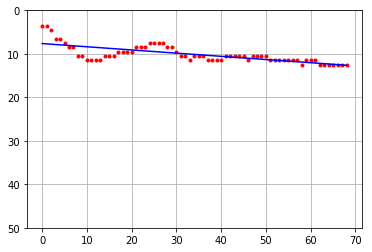

In [161]:
i = 23
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1022
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [135]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72US0.1/SalishSea_1h_20160601_20160605_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

14.5689821243
4.5000705719
0.114811523367


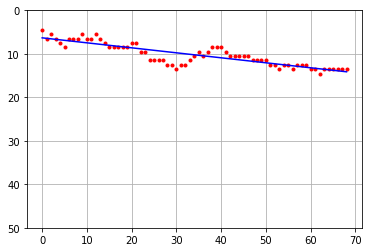

In [138]:
i = 17
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1022
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [139]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/24US0.3/SalishSea_1h_20160601_20160605_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

15.6342878342
6.50031042099
0.0858465881976


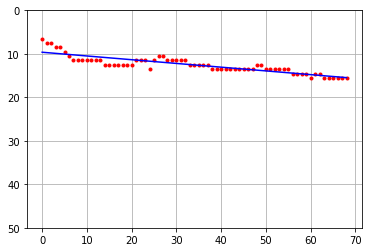

In [145]:
i = 23
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1022
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [146]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/48US0.3/SalishSea_1h_20160601_20160605_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

18.0071353912
7.50062322617
0.112669013666


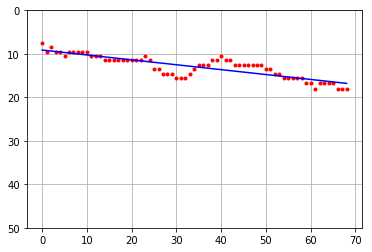

In [151]:
i = 17
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1022
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

In [152]:
file2 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/72US0.3/SalishSea_1h_20160601_20160605_grid_T.nc')
yslice = 200
deptht = file2.variables['deptht'][:]
yslicemask = 1 - lake_meshmask.variables['tmask'][0,:,yslice,:]
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(file2.variables['deptht'][:], 1) * np.ones(284),
                                         (np.ones([284,40]) *np.expand_dims(file2.variables['nav_lat'][yslice,:][:],1)).T])  

19.4817848206
7.50062322617
0.121091605361


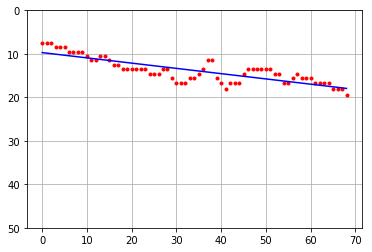

In [157]:
i = 11
density1 = calc_rho(file2.variables['vosaline'][i,:,yslice,68:137],
                    file2.variables['votemper'][i,:,yslice,68:137],
                    pressure1[:, 68:137])
rho = 1022
index1 = (np.abs(density1 - rho)).argmin(axis=0)
list_of_depths1 = np.zeros((69))
for x in range(69):
    list_of_depths1[x] = deptht[index1[x]]
popt, pcov = curve_fit(func, np.arange(0,69), list_of_depths1)
plt.plot(np.arange(0,69), list_of_depths1, 'r.')
plt.grid('on')
plt.ylim(50,0)
plt.plot(np.arange(0,69), func(np.arange(0,69), *popt), 'b-')
print(list_of_depths1.max())
print(list_of_depths1.min())
print(popt[0])

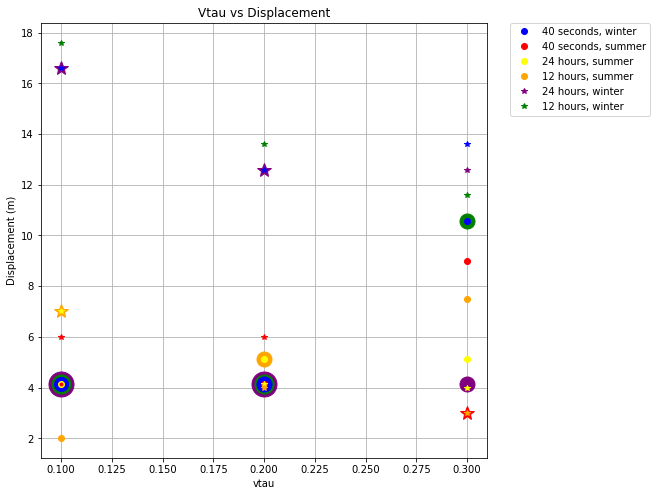

In [217]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set_ylabel('Displacement (m)')
ax.set_xlabel('vtau')
ax.grid('on')
ax.plot(0.2,4.129659653,'o', color='purple', markersize = 25 )
ax.plot(0.2,4.129659653,'o', color='green', markersize = 19)
ax.plot(0.2,4.129659653,'o', color='blue', markersize = 15)
ax.plot(0.1,4.129659653,'o', color='purple', markersize = 25)
ax.plot(0.1,4.129659653,'o', color='green', markersize = 19)
ax.plot(0.1,4.129659653,'o', color='blue', markersize = 14)
ax.plot(0.3,4.129659653,'o', color='purple', markersize = 15)
ax.plot(0.3,10.58550072,'o', color='green', markersize = 15)
ax.plot(0.3,10.58550072,'o', color='blue', label = '40 seconds, winter')
ax.plot(0.2,5.129522324,'o', color='orange', markersize = 15 )
ax.plot(0.2,5.129522324,'o', color='yellow')
ax.plot(0.2,4.129659653,'o', color='red', label = '40 seconds, summer')
ax.plot(0.1,4.129659653,'o', color='yellow', label = '24 hours, summer')
ax.plot(0.1,2.013401032,'o', color='orange', label = '12 hours, summer')
ax.plot(0.1,4.129659653,'.', color='red')
ax.plot(0.3,5.129522324,'o', color='yellow')
ax.plot(0.3,7.502369881,'o', color='orange')
ax.plot(0.3,8.97701931,'o', color='red')
ax.plot(0.2,12.59094429,'*', color='purple', markersize = 15)
ax.plot(0.2,13.59549046,'*', color='green')
ax.plot(0.2,12.59094429,'*', color='blue')
ax.plot(0.1,16.59963274,'*', color='purple', markersize = 15)
ax.plot(0.1,17.59994555,'*', color='green')
ax.plot(0.1,16.59963274,'*', color='blue')
ax.plot(0.3,12.59094429,'*', color='purple', label = '24 hours, winter')
ax.plot(0.3,11.58208942,'*', color='green', label = '12 hours, winter')
ax.plot(0.3,13.59549046,'*', color='blue')
ax.plot(0.2,4.129659653,'*', color='yellow')
ax.plot(0.2,4.00445509,'*', color='orange')
ax.plot(0.2,6.004694939,'*', color='red')
ax.plot(0.1,7.004734993,'*', color='orange', markersize = 15)
ax.plot(0.1,7.004734993,'*', color='yellow')
ax.plot(0.1,6.004694939,'*', color='red')
ax.plot(0.3,4.00445509,'*', color='yellow')
ax.plot(0.3,3.004142284,'*', color='red', markersize=15)
ax.plot(0.3,3.004142284,'*', color='orange')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Vtau vs Displacement')

A plot of vtau vs displacement. The colours indicate the type of wind event (specifically the ramp up time), stars = max upward displacement, circles = max downward displacement, warm colours indicate summer stratification, cool colours show winter stratification.

Notes:
* tracking 1023.3. in winter and 1022 in summer
* upward displacement is generally more than downward (maybe because of chosen density to track?)